# 1.Linear regression model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data=pd.read_csv('AirPassengers.csv')

In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [8]:
#converting a month to date_time format
data['Month'] = pd.to_datetime(data['Month'])  # Parse dates
data.set_index('Month', inplace=True)

In [9]:
data['TimeIndex']=np.arange(len(data))

In [15]:
# Instead of using the lists 'x' and 'y', access the data directly from the DataFrame:
X = data[['TimeIndex']]  # Use double brackets to select as a DataFrame
y = data['#Passengers']

# Now you can split the data into training and testing sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,Y_train)

LinearRegression()

In [18]:
#presdiction
y_pred=model.predict(X_test)

In [20]:
# Metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [21]:
print(mse)
print(r2)

1567.7349896280214
0.8422371912861932


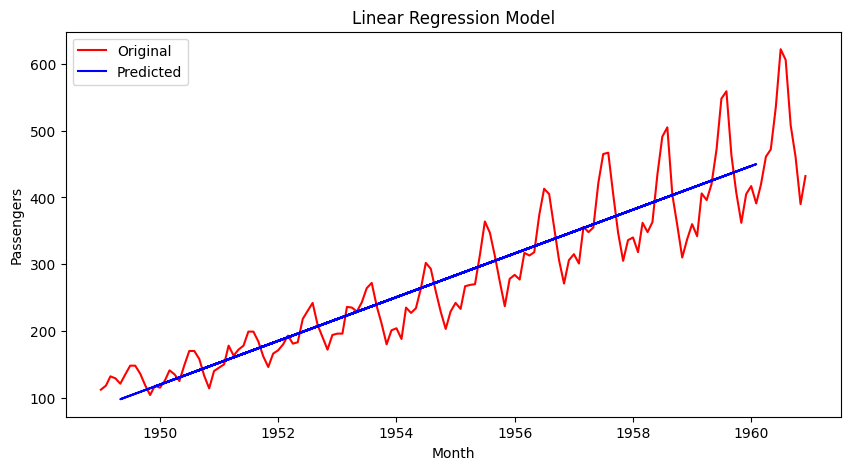

In [25]:
plt.figure(figsize=(10,5))
plt.plot(data.index,y,label='Original',color='red')
plt.plot(X_test.index[-len(Y_test):],y_pred,label='Predicted',color='blue')
plt.legend()
plt.title('Linear Regression Model')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()